In [8]:
import sklearn

print(sklearn.__version__)

0.23.2


In [9]:
#첫 머신러닝 모델 : 붓꽃 데이터셋으로 붓꽃의 품종을 분류(Classification)
#분류(Classification) => 대표적인 지도학습(Superviesd Learning) 방법의 하나
#지도학습 : 학습을 위한 다양한 피처와 분류 결정값인 레이블 데이터로 모델을 학습 -> 별도의 테스트 데이터 세트에서 미지의 레이블을 예측
#<=> 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측
#학습 데이터 : 학습을 위해 주어진 데이터셋 / 테스트 데이터 : ML모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터셋

from sklearn.datasets import load_iris #datasets : 사이킷런에서 자체적으로 제공하는 데이터 셋을 생성
from sklearn.tree import DecisionTreeClassifier #tree : 트리 기반 ML 알고리즘을 구현한 클래스의 모임
from sklearn.model_selection import train_test_split #model_selection : 학습, 검증, 예측 데이터 분리/ 최적의 하이퍼 파라미터로 평가 

In [10]:
import pandas as pd

#붓꽃 데이터 셋을 로딩 
iris = load_iris()

#iris.data는 Iris 데이터 셋에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

#iris.target은 붓꽃 데이터 셋에서 레이블(결정 값) 데이터를 numpy로 가지고 있음
iris_label = iris.target #0 : Setosa / 1: versicolor / 2: virginica
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

#붓꽃 데이터 셋을 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data = iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

#훈련 데이터 : 학습하도록 주는 데이터
#레이블링 : 훈련데이터에 답지를 달아주는 것
#테스트 데이터 : 레이블링이 되지 않은 데이터

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [11]:
str(iris)

'{\'data\': array([[5.1, 3.5, 1.4, 0.2],\n       [4.9, 3. , 1.4, 0.2],\n       [4.7, 3.2, 1.3, 0.2],\n       [4.6, 3.1, 1.5, 0.2],\n       [5. , 3.6, 1.4, 0.2],\n       [5.4, 3.9, 1.7, 0.4],\n       [4.6, 3.4, 1.4, 0.3],\n       [5. , 3.4, 1.5, 0.2],\n       [4.4, 2.9, 1.4, 0.2],\n       [4.9, 3.1, 1.5, 0.1],\n       [5.4, 3.7, 1.5, 0.2],\n       [4.8, 3.4, 1.6, 0.2],\n       [4.8, 3. , 1.4, 0.1],\n       [4.3, 3. , 1.1, 0.1],\n       [5.8, 4. , 1.2, 0.2],\n       [5.7, 4.4, 1.5, 0.4],\n       [5.4, 3.9, 1.3, 0.4],\n       [5.1, 3.5, 1.4, 0.3],\n       [5.7, 3.8, 1.7, 0.3],\n       [5.1, 3.8, 1.5, 0.3],\n       [5.4, 3.4, 1.7, 0.2],\n       [5.1, 3.7, 1.5, 0.4],\n       [4.6, 3.6, 1. , 0.2],\n       [5.1, 3.3, 1.7, 0.5],\n       [4.8, 3.4, 1.9, 0.2],\n       [5. , 3. , 1.6, 0.2],\n       [5. , 3.4, 1.6, 0.4],\n       [5.2, 3.5, 1.5, 0.2],\n       [5.2, 3.4, 1.4, 0.2],\n       [4.7, 3.2, 1.6, 0.2],\n       [4.8, 3.1, 1.6, 0.2],\n       [5.4, 3.4, 1.5, 0.4],\n       [5.2, 4.1, 1.5, 0.1],

In [12]:
#학습용 데이터 & 테스트 데이터 분리 => train_test_split()
#학습용 데이터와 테스트 데이터를 test_size 파라미터 입력 값의 비율로 쉽게 분할
#Ex) test_size = 0.2 => 테스트 데이터 : 20% / 학습용 데이터 80%

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size= 0.2, random_state= 11)
#random_state : 호출할 때마다 같은 학습/테스트 용 데이터 셋을 생성하기 위해 주어지는 난수 발생 값
#만약 지정하지 않으면 수행할 때마다 다른 학습/테스트 용 데이터를 만들 수 있음

In [13]:
#DecisionTreeClassifier
df_clf = DecisionTreeClassifier(random_state= 11) #random_state = 11 : 동일한 학습/예측 결과를 출력하기 위한 용도

#학습 수행
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [14]:
#학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = df_clf.predict(X_test)

In [15]:
#정확도 : 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가 => accuracy_score()
from sklearn.metrics import accuracy_score
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred))) #첫번째 파라미터 : 실제 레이블 데이터 세트 / 두번째 파라미터 : 예측 레이블 데이터 세트

예측 정확도: 0.9333


In [16]:
#사이킷런의 기반 프레임워크 익히기

#fit() : ML모델 학습 / predict() : 학습된 모델의 예측
#Classifier : 분류 알고리즘을 구현한 클래스 / Regressor : 회귀 알고리즘을 구현한 클래스 => 이 둘을 합쳐서 Estimator 클래스

#data : 피처의 데이터셋/target : 분류시 레이블 값, 회귀일 때는 숫자 결괏값 데이터셋/target_names : 개별 레이블의 이름/feature_names : 피처의 이름/DESCR : 데이터셋에 대한 설명과 각 피처의 설명
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data)) #Bunch클래스는 딕셔너리 유형과 유사

<class 'sklearn.utils.Bunch'>


In [17]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [18]:
print('\n feature_names 의 type:', type(iris_data.feature_names))
print(' feature_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print(' target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:', type(iris_data.data))
print(' data의 shape:', iris_data.data.shape)
print(iris_data['data'])

print('\n target의 type:', type(iris_data.target))
print(' target의 shape:', iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
 feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
 target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
 data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [

In [19]:
#Model Selection 모듈

#학습/테스트 데이터 세트 분리 - train_test_split()
#테스트 데이터를 이용X, 학습 데이터셋으로만 학습하고 예측할때의 문제점
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
df_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
df_clf.fit(train_data, train_label)

#학습 데이터 셋으로 예측 수행
pred = df_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred)) #이미 학습한 학습 데이터셋을 기반으로 예측하기 때문에 

예측 정확도: 1.0


In [20]:
#테스트 데이터 셋을 전체의 30%, 학습 데이터 셋을 70%로 분리
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

df_clf = DecisionTreeClassifier() 
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size= 0.3, random_state= 121)

In [21]:
#학습데이터를 기반으로 DecisionTreeClassifier를 학습하고 이 모델을 이용해 예측 정확도를 측정
df_clf.fit(X_train, y_train)
pred = df_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


In [22]:
#과적합 : 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것
#고정된 학습/테스트 데이터셋 => 해당 테스트 데이터에만 과적합되는 모델 => 해결책 : 교차검증(다양한 학습과 평가)
#교차검증 : 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행

#대부분 ML 모델의 성능 평가 : 교차검증 기반으로 1차 평가 => 최종적으로 테스트 데이터셋에 적용해 평가
#K 폴드 교차 검증 : K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
df_clf = DecisionTreeClassifier(random_state= 156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits= 5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [23]:
#KFold 객체에서 split()를 호출시 학습/검증 데이터로 분할할 수 있는 인덱스를 반환
#학습/검증 데이터 추출은 반환된 인덱스를 기반으로 개발 코드에서 직접 수행

#split()를 호출해 교차 검증 수행 시마다 학습과 검증을 반복해 예측 정확도를 측정
n_iter = 0

#KFOold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    #kfold.split()로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    df_clf.fit(X_train, y_train)
    pred = df_clf.predict(X_test)
    n_iter += 1
    #반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 3)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

#개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.967, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.867, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.933, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.733, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


In [24]:
#Stratified K 폴드 : 불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
#불균형한 분포도를 가진 레이블 데이터 집합 : 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말함
#원본 데이터와 유사한 레이블 값의 분포를 학습/테스트 세트에도 유지하는게 매우 중요

#K폴드가 가지고 있는 문제점 확인
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts() #Setosa, Versicolor, Virginica 품종 모두 50개씩

2    50
1    50
0    50
Name: label, dtype: int64

In [25]:
#각 교차 검증 시마다 생성되는 학습/검증 레이블 데이터 값의 분포도를 확인 
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    #학습 데이터1,2 => 0의 경우 전혀 학습 X / 검증 레이블 0만 => 0을 예측X

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [26]:
#StratifiedKFold는 split()메서드에 인자로 피처 데이터셋 & 레이블 데이터셋
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits= 3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64


In [27]:
#StratifiedKFold를 이용해 데이터 분리
df_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

#StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요 
for train_index, test_index in skfold.split(features, label):
    #split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    df_clf.fit(X_train, y_train)
    pred = df_clf.predict(X_test)

    #반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

    #교차 검증별 정확도 및 평균 정확도 계산
    print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
    print('## 평균 검증 정확도:', np.mean(cv_accuracy))

#일반적으로 K폴드가 아니라 Stratified K폴드로 분할
#회귀에서는 Stratified K폴드 지원X(b/c 회귀의 결정값은 연속형이기 때문에 결정값별로 분포를 정하는 의미X)


#1 교차 검증 정확도 : 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

## 교차 검증별 정확도: [0.98]
## 평균 검증 정확도: 0.98

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

## 교차 검증별 정확도: [0.98 0.94]
## 평균 검증 정확도: 0.96

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


In [28]:
#교차 검증을 보다 간편하게 - cross_val_score()
#cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verdose=0, fit_params=None, pre_dispatch='2*n_jobs')
#estimator : Classifier 또는 Regressor/ X : 피처 데이터셋/ y : 레이블 데이터셋/ scoring : 예측 성능 평가 지표/ cv : 교차 검증 폴드 수
#classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 셋을 분할

#교차검증 폴드 수 : 3, 성능 평가 지표 : accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state= 156)

data = iris_data.data
label = iris_data.target

#성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(df_clf, data, label, scoring='accuracy', cv = 3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

#cross_validate() : 여러 개의 평가 지표 반환 가능

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


In [29]:
#하이퍼 파라미터 : 머신러닝 알고리즘을 구성하는 주요 구성 요소, 이를 조정해 알고리즘의 예측 성능을 개선
#GridSearchCV : 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공

#결정 트리 알고리즘의 여러 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조합 찾기
grid_parameters = {'max_depth' : [1, 2, 3],
                   'min_samples_split' : [2, 3]}

In [30]:
#GridSearchCV : 데이터 세트를 cross-validation을 위한 학습/테스트 세트로 자동으로 분할한 뒤에 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾음
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size= 0.2, random_state=121)

dtree = DecisionTreeClassifier()

##파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2, 3]}

In [31]:
import pandas as pd

#param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정.
### refit = True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv = 3, refit=True)

#붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가.
grid_dtree.fit(X_train, y_train)

#GridSearchCV 결과를 추출해 Dataframe으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_) #cv_results_ : 기술된 하이퍼 파라미터를 순차적으로 변겅하면서 학습/평가를 수행하고 결과 기록
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]
#rank_test_score : 결과 예측 성능 순위
#mean_test_score : 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [32]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))
#max_depth: 3, min_samples_split: 2일때 검증용 폴드 세트에서 평균 최고 정확도가 96.67%

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [33]:
#GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

#GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

#학습 데이터를 GriedSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법

테스트 데이터 세트 정확도: 0.9667


In [34]:
#### 데이터 전처리 ####
#ML 알고리즘에는 결손값을 허용X => 결손값을 처리하는 것은 결정자, 사람의 몫

#사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용X => 모든 문자열 값은 인코딩돼서 숫자 형으로 변환

## 데이터 인코딩 ##
# 레이블 인코딩 : 카테고리 피처를 코드형 숫자 값으로 변환 (Ex. TV : 1, 냉장고 : 2, 전자레인지 : 3, 컴퓨터 : 4) 
#LabelEncoder클래스로 레이블 인코딩 구현

from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)
print('인코딩 클래스:', encoder.classes_)
print('디코딩 원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

#레이블 인코딩은 선형회귀와 같은 ML알고리즘에는 적용X, 트리 계열의 ML알고리즘은 적용 O.K

인코딩 변환값: [0 1 4 5 3 3 2 2]
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [35]:
#원-핫 인코딩 : 레이블 인코딩의 문제점을 해결하기 위한 인코딩 방식
#해당 고유 값에 매칭되는 피처만 1이 되고 나머지 피처는 0을 입력

#주의 : OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야 함/ 입력 값으로 2차원 데이터가 필요
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

#먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
#2차원 데이터로 변환
labels = labels.reshape(-1, 1)

#원-핫 인코딩을 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [36]:
#판다스에서 원-핫 인코딩 => get_dummies()
import pandas as pd

df = pd.DataFrame({'items' : ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [37]:
### 피처 스케일링과 정규화 ###

#피처 스케일링(feature scaling) : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업 => 표준화, 정규화
#표준화(Standardization) : 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것
#정규화(Normalization) : 서로 다른 피처의 크기를 통일하기 위해 변환 => 개별 데이터의 크기를 모두 똑같은 단위로 변경
#사이킷런의 Normailzer 모듈은 선형대수에서의 정규화 개념이 적용, 개별 벡터의 크기를 맞추기 위해 변환

#StandardScaler => 표준화를 쉽게 지원하기 위한 클래스 => 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환
from sklearn.datasets import load_iris
import pandas as pd
#붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [38]:
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성 : 표준화를 지원
scaler = StandardScaler()
#StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled =scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [39]:
#MinMaxScaler : 데이터값을 0과 1사이의 범위 값으로 변환 => 데이터 분포가 가우시안 분포가 아닐 경우 적용

from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler객체 생성
scaler = MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled =pd.DataFrame(data = iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [40]:
#학습 데이터와 테스트 데이터의 스케일링 변환시 유의점
#Scaler 객체를 이용해 스케일링 변환 => fit(),transform(),fit_transform()
#fit() : 데이터 변환을 위한 기준 정보 설정을 적용 / transform() : 설정된 정보를 이용해 데이터 변환 / fit_transform() : fit()과 transform()을 한번에 적용

#주의점 : 테스트 데이터 세트로는 다시 fit()을 수행X, 학습 데이터 세트의 fit()에 transform()을 적용

#테스트 데이터에 fit()을 적용할때의 문제점
from sklearn.preprocessing import MinMaxScaler
import numpy as np
#학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
#Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

In [41]:
#MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1값으로 변환
scaler = MinMaxScaler()

#fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

#1/10 scale로 train_array 데이터 변환함. 원본 10 -> 1 로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [42]:
#MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

#test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [43]:
#머신러닝 모델은 학습 데이터를 기반으로 학습 => 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 함
#테스트 데이터에 fit()을 적용X, 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환해야 함


#테스트 데이터에 fit()을 호출하지 않고 학습 데이터로 fit()을 수행한 MinMaxScaler 객체의 transform()을 이용해 데이터를 변환
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

#test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함.
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

#fit_transform()을 적용하면 fit()과 transform()을 순차적으로 수행 => 테스트 데이터에서는 절대 사용X (학습 데이터에는 O.K)
#전체 데이터 세트에 스케일링을 적용한 뒤 학습과 테스트 데이터 세트로 분리하는 것이 바람직

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv(r'C:\Users\seven\OneDrive\바탕 화면\Kaggle\train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [45]:
print('\n ###학습 데이터 정보### \n')
print(titanic_df.info())
#Pandas의 object타입 = string타입


 ###학습 데이터 정보### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [46]:
#사이킷런 ML 알고리즘은 Null값을 허용 X
#Age,Cabin,Embarked 컬럼의 Null값 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null값 개수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null값 개수  0


In [47]:
#문자열 피처 => Sex, Cabin, Embarked
print(' Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
C22 C26          3
              ... 
D10 D12          1
A32              1
C85              1
C49              1
C50              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [48]:
#Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요
#Why? 이 시절에는 부자와 가난한 사람에 대한 차별이 더 있던 시절이기 때문에 일등실에 투숙한 사람이 삼등실에 투숙한 사람보다 더 살아날 확률 UP

#Cabin속성의 앞 문자만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [49]:
#어떤 유형의 승객이 생존 확률이 높았는지 확인
#성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수를 비교
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

#Survived 컬럼은 레이블로서 결정 클래스 값 (0 : 사망, 1 : 생존

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

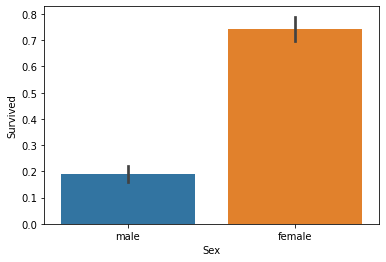

In [50]:
#남녀생존률 시각화 => Seaborn 패키지
#X축에 'Sex'컬럼, Y축은 'Survived'컬럼
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

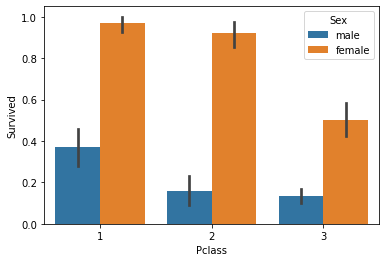

In [51]:
#부자와 가난한 사람의 생존 확률 => 객실 등급 확인
#성별을 고려해 객실등급별 생존 확률 확인

sns.barplot(x = "Pclass", y = "Survived", hue = 'Sex', data = titanic_df)

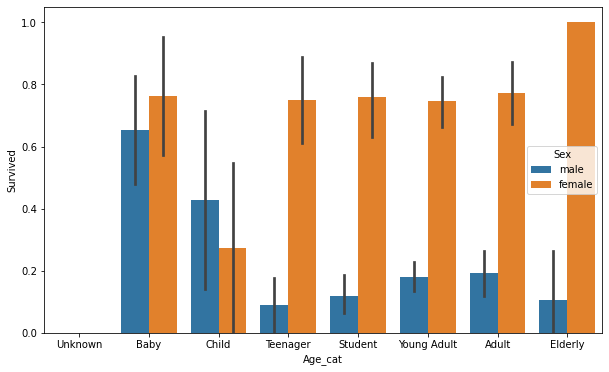

In [52]:
#Age에 따른 생존 확률 
#Age 값 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당
# 0 ~ 5 : Baby, 6 ~ 12 : Child, 13 ~ 18 : Teenager, 19 ~ 25 : Student, 26 ~ 35 : Young Adult, 36 ~ 60 : Adult, 61 ~ : Elderly

#입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'

    return cat


#막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

#X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
#get_category(X)는 입력값으로 'Age'칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis= 1, inplace=True)

#Sex, Age, PClass등이 중요하게 생존을 좌우하는 피처

In [53]:
#문자열 카테고리 피처 => 숫자형 카테고리 피처로 변환
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [54]:
#피처를 가공한 내역을 정리, 함수로 만들기
#transform_features() : 데이터의 전처리를 전체적으로 호출하는 함수

from sklearn import preprocessing
#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

#ML 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

#레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [55]:
#원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
titanic_df = pd.read_csv(r'C:\Users\seven\OneDrive\바탕 화면\Kaggle\train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [57]:
#결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자 예측
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
df_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
df_clf.fit(X_train, y_train)
df_pred = df_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, df_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
#교차 검증으로 결정 트리 모델 평가

#KFold 클래스
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    #폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 새엉
    kfold = KFold(n_splits=folds)
    scores = []

    #KFold 교차 검증 수행.
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        #X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        #Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

    #5개 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))
#exec_kfold 호출
exec_kfold(df_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(df_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores))) 
#cross_val_score()는 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문에 Kfold와 값이 약간 다름

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [60]:
#GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능 측정
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2, 3, 5, 10],
              'min_samples_split' : [2, 3, 5], 'min_samples_leaf' : [1, 5, 8]}

grid_dclf = GridSearchCV(df_clf, param_grid=parameters, scoring='accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dprediction = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dprediction)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
